In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import set_matplotlib_formats
from matplotlib import gridspec
from matplotlib.legend import Legend
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
orange = ["#ff8c00"]
blue = ["#4173b3"]
green = ["#66cdaa"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
#Load data files for right panel
startI=0
dataFile = '../data/TimeScalingR.dat'
data = np.loadtxt(dataFile)
L = data[:,0]
CH_IB_time= data[:,1]
CH_OTF_time= data[:,2]
Diagonalizing_time= data[:,3]
OBDM_IB_time= data[:,4]
OBDM_OTF_time= data[:-2,5]

In [4]:
#Load data files for left panel
startI=0
dataFile = '../data/TimeScalingL.dat'
data = np.loadtxt(dataFile)
L1 = data[:,0]
Lfit= np.array([15.5,16, 17,18,19,20,20.5])
CH_IB_time1= data[:,1]
CH_OTF_time1= data[:,2]
m, x0 = np.polyfit(L1[:],CH_OTF_time1[:]/CH_IB_time1[:], 1)##

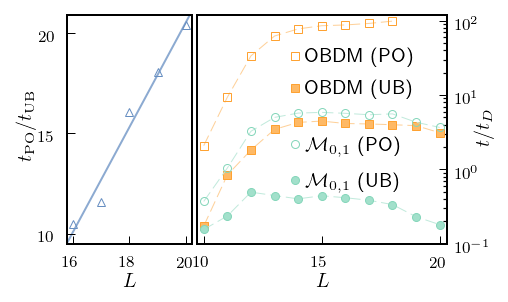

In [5]:
plt.style.reload_library()
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,2]) 
    curves=[]
    ax0 = plt.subplot(gs[1])
    ax1 = plt.subplot(gs[0])
    
    #Right panel
    ax0.set_xlabel(r'$L$', labelpad=-0)
    ax0.set_ylabel(r'$t/t_D$',labelpad=-10)
    ax0.set_yscale('log')
    curves+=ax0.plot(L[:-2],OBDM_OTF_time/Diagonalizing_time[:-2],'--s',mew=.5,markerfacecolor="none",markeredgecolor=orange[2],color=orange[4], markersize = 4,linewidth=0.5,label='OBDM (PO)')
    curves+=ax0.plot(L,OBDM_IB_time/Diagonalizing_time,'--s',mew=.5,markerfacecolor=orange[3],markeredgecolor=orange[2],color=orange[4], markersize = 4,label='OBDM (UB)',linewidth=0.5)
    curves+=ax0.plot(L,CH_OTF_time/Diagonalizing_time,'--o',mew=.5,markerfacecolor="none",markeredgecolor=green[2],color=green[4], markersize = 4,label=' H (PO)',linewidth=0.5)
    curves+=ax0.plot(L,CH_IB_time/Diagonalizing_time,'--o',mew=.5,markerfacecolor=green[3],markeredgecolor=green[2],color=green[4], markersize = 4,label=' H (UB)',linewidth=0.5)
    ax0.legend(curves[:2],['OBDM (PO)','OBDM (UB)'],ncol=1,loc=(0.36,0.60), handlelength=0,handleheight=-0.0,labelspacing=.5)
    leg = Legend(ax0, curves[2:], [r'$\mathcal{M}_{0,1}$ (PO)', r'$\mathcal{M}_{0,1}$ (UB)'],loc=(0.36,0.19), frameon=False, handlelength=0,handleheight=-0.0,labelspacing=.5)
    ax0.add_artist(leg)
    ax0.yaxis.set_label_position('right')
    ax0.tick_params(axis='y', left="off", right="on",which='both',labelleft='off',labelright='on')
    ax0.tick_params(axis='x', top="off", bottom="on",which='both',labeltop='off',labelbottom='on')
    ax0.set_xticks([10, 15, 20])
    ax0.set_xlim(9.70,20.3)
    ax0.set_ylim(.1,120)

    #Left panel
    ax1.set_xlabel(r'$L$', labelpad=-0)
    ax1.set_ylabel(r'$t_{\rm{PO}}/t_{\rm{UB}}$', labelpad=1)
    ax1.plot(Lfit,m*Lfit+x0,'-',color=blue[3], markersize = 6, zorder=-1,linewidth=1)
    ax1.plot(L1,CH_OTF_time1/CH_IB_time1,'^',mew=.5,markerfacecolor="none",markeredgecolor=blue[2],color=red[4], markersize = 4)
    ax1.tick_params(axis='y', left="on", right="off",which='both',labelleft='on',labelright='off')
    ax1.tick_params(axis='x', top="off", bottom="on",which='both',labeltop='off',labelbottom='on')
    ax1.set_xlim(15.8,20.2)
    ax1.set_ylim(9.5,20.9)

    plt.locator_params(nbins=4)
    gs.update(wspace=0.025) # set the spacing between axes. 
    plt.savefig('../figures/TimeScaling.pdf', transparent=False)    
    plt.savefig('../figures/TimeScaling.svg', transparent=False)    
    plt.show